### Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
# reduce(function, iterable, initial)
from functools import reduce
import matplotlib.pyplot as plt
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor

## Lab Task

## Video Games Sales Analysis

In [30]:
videoSalesData = pd.read_csv("data/vgsales.csv")
videoSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [31]:
videoSalesData.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
def map_function(row):
    # Create key-value pairs (product category, sales amount)
    # take care you have to get all sales
    key = row[4]
    value = row[10]
    return (key, value)

In [46]:
def reduce_function(mapped_data):
    # Aggregate sales amounts for each product category
    sales_by_category = {}
    for data in mapped_data:
        print("data",data)
        elements = [element for element in data]
        print("elements",elements)
        print("sales_by_category.get(element[0], 0)",sales_by_category.get(elements[0], 0))
            
        sales_by_category[elements[0]] = sales_by_category.get(elements[0], 0) + elements[1]
    return sales_by_category


In [47]:
# 1- get key value pairs 
mapped_data = [map_function(row) for index, row in videoSalesData.iterrows()]
print("mapped_data",type(mapped_data[0]))
# 2- reduce pairs and get total sales
genreSales = reduce_function(mapped_data)
genreSales

mapped_data <class 'tuple'>
data ('Sports', 82.74)
elements ['Sports', 82.74]
sales_by_category.get(element[0], 0) 0
data ('Platform', 40.24)
elements ['Platform', 40.24]
sales_by_category.get(element[0], 0) 0
data ('Racing', 35.82)
elements ['Racing', 35.82]
sales_by_category.get(element[0], 0) 0
data ('Sports', 33.0)
elements ['Sports', 33.0]
sales_by_category.get(element[0], 0) 82.74
data ('Role-Playing', 31.37)
elements ['Role-Playing', 31.37]
sales_by_category.get(element[0], 0) 0
data ('Puzzle', 30.26)
elements ['Puzzle', 30.26]
sales_by_category.get(element[0], 0) 0
data ('Platform', 30.01)
elements ['Platform', 30.01]
sales_by_category.get(element[0], 0) 40.24
data ('Misc', 29.02)
elements ['Misc', 29.02]
sales_by_category.get(element[0], 0) 0
data ('Platform', 28.62)
elements ['Platform', 28.62]
sales_by_category.get(element[0], 0) 70.25
data ('Shooter', 28.31)
elements ['Shooter', 28.31]
sales_by_category.get(element[0], 0) 0
data ('Simulation', 24.76)
elements ['Simulation',

{'Sports': 1330.929999999988,
 'Platform': 831.3699999999974,
 'Racing': 732.0399999999955,
 'Role-Playing': 927.3699999999941,
 'Puzzle': 244.9500000000005,
 'Misc': 809.9599999999936,
 'Shooter': 1037.3699999999901,
 'Simulation': 392.19999999999783,
 'Action': 1751.1799999999691,
 'Fighting': 448.90999999999923,
 'Adventure': 239.04000000000138,
 'Strategy': 175.1200000000004}

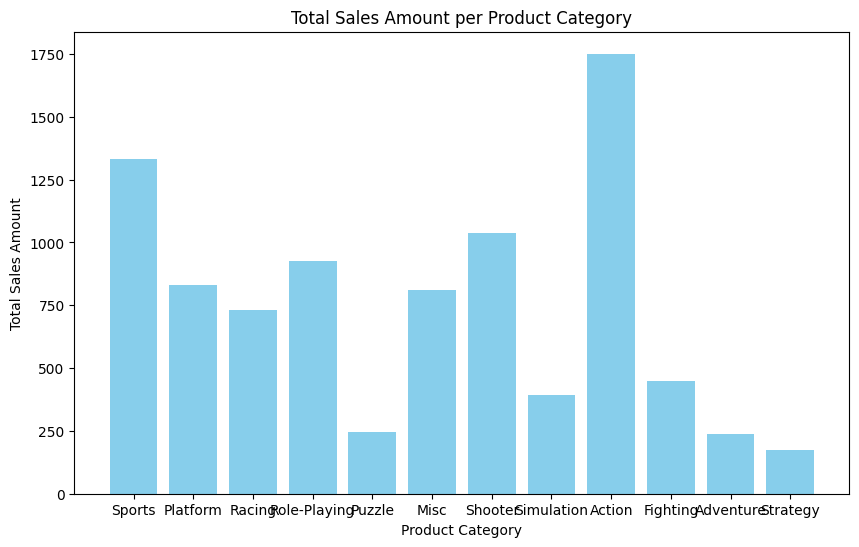

In [48]:
plt.figure(figsize=(10, 6))
plt.bar( list(genreSales.keys()),list(genreSales.values()), color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount per Product Category')
plt.show()

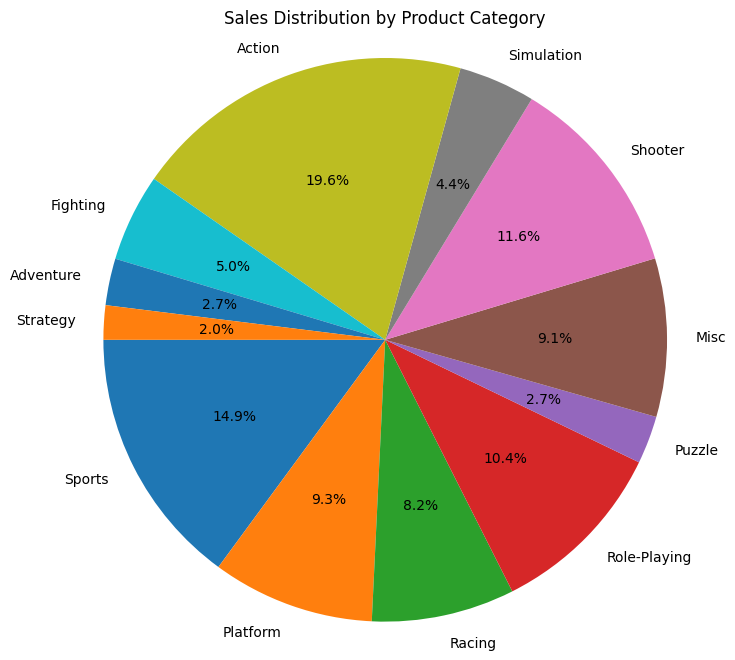

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(list(genreSales.values()), labels=list(genreSales.keys()), autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sales Distribution by Product Category')
plt.show()

### Parallelizing Video Sales Analysis

In [75]:
def reduce_function(mapped_data):
    # Aggregate sales amounts for each product category
    sales_by_category = {}
    for mapped_chunk in mapped_data:
        elements = [element for element in mapped_chunk]

        sales_by_category[elements[0]] = sales_by_category.get(elements[0], 0) + elements[1]

    return list(sales_by_category.items())



In [76]:

def map_reduce_chunk(chunk):
    # you can call your function map_function to map your data
    # you can call your reduce_function to reduce each chunk
    chunk_result = {}
    mapped_data = [map_function(row) for index, row in chunk.iterrows()]
    print("HERE mapeed_data",mapped_data)
    chunk_result = reduce_function(mapped_data)
    print("chunk_result",chunk_result)
    return chunk_result






In [60]:
# Split the dataset into chunks for parallel processing
# feel free to change chunks size
chunk_size = len(videoSalesData) // 3  
data_chunks = [videoSalesData[i:i + chunk_size] for i in range(0, len(videoSalesData), chunk_size)]

In [77]:
# Use concurrent.futures to parallelize the map phase
result = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    future_to_chunk = {executor.submit(map_reduce_chunk, chunk): chunk for chunk in data_chunks}
    for future in concurrent.futures.as_completed(future_to_chunk):
        chunk_result = future.result()
        print(chunk_result)
        for genre in chunk_result:
            result.setdefault(genre[0], 0)
            result[genre[0]] += genre[1]

HERE mapeed_data [('Puzzle', 0.01), ('Platform', 0.01)]
chunk_result [('Puzzle', 0.01), ('Platform', 0.01)]
[('Puzzle', 0.01), ('Platform', 0.01)]
HERE mapeed_data [('Role-Playing', 0.09), ('Misc', 0.09), ('Adventure', 0.09), ('Simulation', 0.09), ('Strategy', 0.09), ('Role-Playing', 0.09), ('Fighting', 0.09), ('Misc', 0.09), ('Sports', 0.09), ('Role-Playing', 0.09), ('Misc', 0.09), ('Action', 0.09), ('Action', 0.09), ('Fighting', 0.09), ('Action', 0.09), ('Action', 0.09), ('Misc', 0.09), ('Misc', 0.09), ('Simulation', 0.09), ('Sports', 0.09), ('Sports', 0.09), ('Sports', 0.09), ('Adventure', 0.09), ('Platform', 0.09), ('Racing', 0.09), ('Racing', 0.09), ('Platform', 0.09), ('Simulation', 0.09), ('Misc', 0.09), ('Racing', 0.09), ('Action', 0.09), ('Strategy', 0.09), ('Sports', 0.09), ('Role-Playing', 0.09), ('Action', 0.09), ('Action', 0.09), ('Misc', 0.09), ('Misc', 0.09), ('Role-Playing', 0.09), ('Shooter', 0.09), ('Action', 0.09), ('Misc', 0.09), ('Strategy', 0.09), ('Misc', 0.09), 

In [78]:
# Print the parallelized result
print("\nTask 2: Total Sales Amount per Product Category (Parallelized)")
for product, total_sales in result.items():
    print(f"Product Category: {product}, Total Sales Amount: {total_sales}")


Task 2: Total Sales Amount per Product Category (Parallelized)
Product Category: Puzzle, Total Sales Amount: 244.9499999999999
Product Category: Platform, Total Sales Amount: 831.3699999999998
Product Category: Role-Playing, Total Sales Amount: 927.3700000000001
Product Category: Misc, Total Sales Amount: 809.9599999999998
Product Category: Adventure, Total Sales Amount: 239.04000000000028
Product Category: Simulation, Total Sales Amount: 392.20000000000005
Product Category: Strategy, Total Sales Amount: 175.11999999999995
Product Category: Fighting, Total Sales Amount: 448.91000000000025
Product Category: Sports, Total Sales Amount: 1330.930000000005
Product Category: Action, Total Sales Amount: 1751.180000000002
Product Category: Racing, Total Sales Amount: 732.0400000000006
Product Category: Shooter, Total Sales Amount: 1037.3700000000006
